In [3]:
%pylab inline
import tensorflow as tf
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vivi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
symptoms = pd.read_csv('cam_symptoms_age_gender.csv',encoding='latin-1')
symptoms.columns = ['ID','shit','disease','symptom','date','gender','age','count']
symptoms = symptoms.dropna().reset_index(drop=True)
Stomachsymptoms=symptoms[['disease','symptom','gender','age','count']]

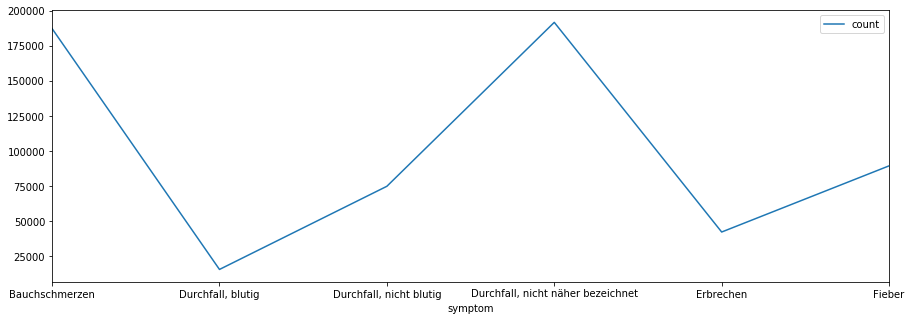

In [25]:
gbS = Stomachsymptoms.groupby(['symptom']).sum()
gbS.plot(figsize=(15,5))

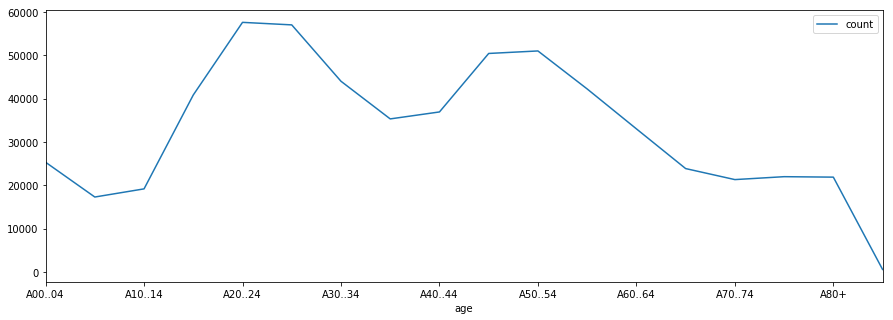

In [26]:
gbA = Stomachsymptoms.groupby(['age']).sum()
gbA.plot(figsize=(15,5))

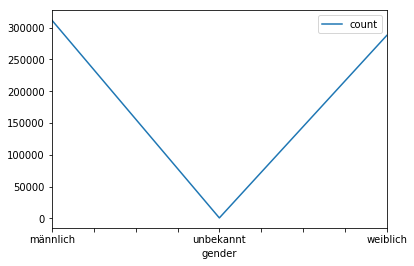

In [20]:
gbG = Stomachsymptoms.groupby(['gender']).sum()
gbG.plot()

In [89]:
symptoms = pd.read_csv('invrtvnovwind_symptoms_age_gender.csv',encoding='latin-1')
symptoms.columns = ['ID','shit','x','disease','c','symptom','d','date','s','gender','c','age','f','count']
symptoms = symptoms.dropna().reset_index(drop=True)
Othersymptoms=symptoms[['disease','symptom','gender','age','count']]
Allsymptoms = Stomachsymptoms.append(Othersymptoms)
Allsymptoms.iloc[1]

disease    Campylobacter-Enteritis
symptom             Bauchschmerzen
gender                    weiblich
age                        A15..19
count                            1
Name: 1, dtype: object

In [50]:
def CreateDictionary(x,savename):#gives IDs to all possible values for a certain table entry and saves dictionary in .csv file
    unique = pd.DataFrame(x.unique())
    unique.to_csv(savename)
    return unique
def LoadDictionary(dictname):
    dic = pd.read_csv(dictname,names=['ID','0'],skiprows=1,encoding='latin-1').set_index('ID')
    return dic
def GetDictionaryEntry(x,dictionary,direction):
    if direction=='ID':
        try:
            return dictionary.loc[dictionary['0']==x].index[0]
        except:
            return int(dictionary.shape[0])+1
    elif direction=='entry':
        return dictionary[dictionary.index==x]['0']
    else:
        print('wrong input. Specify direction with "ID" or "entry"')

In [48]:
CreateDictionary(Allsymptoms['disease'],'diseaseDic.csv')
CreateDictionary(Allsymptoms['symptom'],'symptomDic.csv')
CreateDictionary(Allsymptoms['gender'],'genderDic.csv')
CreateDictionary(Allsymptoms['age'],'ageDic.csv')
print('Done')

Done


In [51]:
#load dictionaries:
diseaseDic = LoadDictionary('diseaseDic.csv')
symptomDic = LoadDictionary('symptomDic.csv')
genderDic = LoadDictionary('genderDic.csv')
ageDic = LoadDictionary('ageDic.csv')

In [57]:
GetDictionaryEntry('Kopfschmerzen',symptomDic,'ID')

23

In [104]:
Allsymptoms

,disease,symptom,gender,age,count
0,Campylobacter-Enteritis,Bauchschmerzen,männlich,A35..39,1
1,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A15..19,1
2,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A00..04,1
3,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A05..09,1
4,Campylobacter-Enteritis,Bauchschmerzen,weiblich,Unbekannt,1
5,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A15..19,1
6,Campylobacter-Enteritis,Bauchschmerzen,männlich,A00..04,1
7,Campylobacter-Enteritis,Bauchschmerzen,männlich,Unbekannt,1
8,Campylobacter-Enteritis,Bauchschmerzen,männlich,A35..39,1
9,Campylobacter-Enteritis,Bauchschmerzen,männlich,A10..14,1


In [108]:
Data = pd.DataFrame(['disease','symptom','gender','age'])
for i,e in enumerate(Allsymptoms['disease']):
    #print(Allsymptoms['count'][i].values[0])
    #print(Allsymptoms[['disease','symptom','gender','age']].iloc[i])
    line = pd.DataFrame(Allsymptoms[['disease','symptom','gender','age']].iloc[i])
    for n in range(Allsymptoms['count'][i].values[0]):
        #print(line[0]['disease'])
        #newline = pd.DataFrame({'disease':line[i]['disease'],'symptom':line[i]['symptom'],'gender':line[i]['gender'],'age':line[i]['age']},ignore_index=True)
        #print(line)
        Data = Data.append({'disease':line[i]['disease'],'symptom':line[i]['symptom'],'gender':line[i]['gender'],'age':line[i]['age']},ignore_index=True)
ready = Data[['disease','symptom','gender','age']][4:]

C:\Users\Vivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [ ]:
ready.to_csv('symptomsDist.csv')

In [ ]:
ready = pd.read_csv('symptomsDist.csv')

In [59]:
lenall = ready.shape[0]
trainSize = lenall//6*5#define sizes for data sets (train: 2/3, val:1/6, test:1/6 of whole dataset) 
valSize = 0#lenall//6

#Split data into train, val and test set------------------------------------------
trainingData = ready.iloc[0:trainSize].reset_index(drop=True)
validationData = ready.iloc[trainSize+1:trainSize+valSize].reset_index(drop=True)
trainingData

,disease,symptom,gender,age,count
0,Campylobacter-Enteritis,Bauchschmerzen,männlich,A35..39,1
1,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A15..19,1
2,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A00..04,1
3,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A05..09,1
4,Campylobacter-Enteritis,Bauchschmerzen,weiblich,Unbekannt,1
5,Campylobacter-Enteritis,Bauchschmerzen,weiblich,A15..19,1
6,Campylobacter-Enteritis,Bauchschmerzen,männlich,A00..04,1
7,Campylobacter-Enteritis,Bauchschmerzen,männlich,Unbekannt,1
8,Campylobacter-Enteritis,Bauchschmerzen,männlich,A35..39,1
9,Campylobacter-Enteritis,Bauchschmerzen,männlich,A10..14,1


In [ ]:
#Method to get batches------------------------------------------------------------
def getBatches(batchsize,typeBatch):
    if typeBatch=="train":
        numBatches = shape(trainingData)[0]//batchsize
        Batches=[]
        for count in range(numBatches-1):
            batch = trainingData[count*batchsize:(count+1)*batchsize]
            b,l=formatBatch(batch[['symptom','gender','age']],batch['disease'],batchsize)
            #newb = addAreaRisk(b,batch.reset_index(),batchsize,batch['week'].reset_index(),batch['year'].reset_index())
            #print(newb)
            Batches.append([b,l])
    elif typeBatch=="val":
        batch = validationData.sample(batchsize)
        labels = validationLabels.iloc[batch.index]
        b,l=formatBatch(batch,labels,batchsize)
        Batches  = [b,l]
    else:
        print("typeBatch needs to be set to one of these values: train, val, test.")
        pass
    return Batches

def formatBatch(batch,labels,batchsize):
    batch = batch.reset_index(drop=True)
    labels = labels.reset_index(drop=True)
    newl = []
    newb = []
    for i,b in enumerate(batch['symptom']):
        symp = GetDictionaryEntry(b,symptomDic,'ID')
        gender = GetDictionaryEntry(batch['gender'][i],genderDic,'ID')
        age = GetDictionaryEntry(batch['age'][i],ageDic,'ID')
        newb = np.append(newb,[int(symp),int(gender),int(age)])
    for ind,l in enumerate(labels['disease']):
        newl = np.append(newl,int(GetDictionaryEntry(l,diseaseDic,'ID')))
    return np.reshape(newb,(batchsize,3)),np.reshape(newl,(batchsize,1))
def addAreaRisk(batch,dfBatch,batchsize,week,year):
    records = []
    newb = []
    for i in range(batchsize):
        thisweek = week['week'][i]
        thisyear = year['year'][i]
        MapNum = (thisyear-2001)*52+thisweek
        x = dfBatch['BinX'][i]
        y = dfBatch['BinY'][i]
        binrisk = allMaps[MapNum][int(x[1:-1])][int(y[1:-1])]
        newb = np.append(batch[i],binrisk/100)
        records.append(newb)
    return records

In [ ]:
tf.reset_default_graph()
%matplotlib notebook
learning_rate = 0.05
batch_size = 20
training_epochs = 100
display_step = 1
complexInput=False
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 3 
n_classes = diseaseDic 
step = 1

# tf Graph input
X = tf.placeholder("float32", [None,n_input])
Y = tf.placeholder("float32",[None,1])

#InputVec=tf.reduce_max(tf.one_hot(X,depth=9999),axis=1)
TargetVec=tf.reduce_max(tf.one_hot(Y,depth=shape(diseaseDic)[0]),axis=1)

keep_probability = tf.placeholder("float")

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=1/n_input)),#**(-1/2))),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=1/n_hidden_1)),#**(-1/2))),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=1/n_hidden_2))#**(-1/2)))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bout': tf.Variable(tf.random_normal([n_classes]))
}

def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(x, weights['h1']), biases['b1'])),keep_probability)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.dropout(tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])),keep_probability)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['bout']
    return out_layer

outP = multilayer_perceptron(X)

loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=outP, labels=targetVec))
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [ ]:
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    saver = tf.train.Saver()
    kp=1.0
    samplePred = []
    sample = []
    allLoss = []
    for n in range(training_epochs):
        losses = []
        for b in getBatches(batch_size,"train"):
            _,loss,output = sess.run([train_op,loss_op,outP], feed_dict={X: b[0],Y: b[1],keep_probability:kp})  

            losses = np.append(losses,loss)
            step = step + 1
        lastout = output[2]
        samplePred = np.append(samplePred,output[2][1])#lastout[1])
        sample = np.append(sample,b[1][1][2])
        allLoss = np.append(allLoss,np.mean(losses))
        print("epoch: ",n,' - Step: ',step)
        print("pred: ",lastout)
        print("true: ",b[1][2])
        print("loss: ",np.mean(losses))